# 1. Hypothesis Generation


Item Weight: It is hypothesized that heavier items may have higher sales due to perceptions of value or quality. Conversely, lighter items may be perceived as more convenient and thus have higher sales.

Item Fat Content: Consumers may have preferences for products with certain fat content levels based on health consciousness or dietary preferences. Thus, items with lower fat content may have higher sales in markets where health-consciousness is prevalent.

Item Visibility: Items placed in more visible areas within the store may experience higher sales as they are more likely to catch the attention of customers. Therefore, higher visibility could lead to increased sales.

Item Type: Different types of items may have varying demand levels based on consumer preferences and seasonal trends. For example, perishable items might have higher sales during certain seasons, while non-perishable items may have consistent sales throughout the year.

Item MRP (Maximum Retail Price): It is expected that lower MRP items may have higher sales due to affordability, while higher-priced items may have lower sales unless they offer perceived value or are targeted at a specific market segment.

Outlet Establishment Year: Older outlets may have built a loyal customer base over time, leading to higher sales compared to newer outlets. However, newer outlets may attract customers with modern amenities and marketing strategies, potentially leading to higher sales as well.

Outlet Location Type: Outlets located in high-traffic areas such as shopping malls or city centers may experience higher footfall and consequently higher sales compared to outlets in less accessible locations.

Outlet Size: Larger outlets may offer a wider product assortment and more space for customer movement, potentially leading to higher sales compared to smaller outlets.

Outlet Type: Different types of outlets may attract different customer segments with varying purchasing behaviors. For example, a hypermarket may attract bulk buyers, leading to higher sales of certain items compared to a neighborhood grocery store.

By analyzing these attributes and their potential impact on sales, the predictive model aims to uncover patterns and relationships that can be leveraged by BigMart to optimize their product offerings, store layouts, and marketing strategies, ultimately leading to increased sales and improved profitability.

# 2. Loading Packages and Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd

train = pd.read_csv('gdrive/My Drive/TechnoColab/Train.csv')
test = pd.read_csv('gdrive/My Drive/TechnoColab/Test.csv')


Mounted at /content/gdrive


# 3. Exploratory Data Analysis

In [2]:
print(train.shape)

(8523, 12)


In [3]:
print(train.head(3))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   
2           FDN15        17.50          Low Fat         0.016760         Meat   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 4. Univariate Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

i. Item Weight


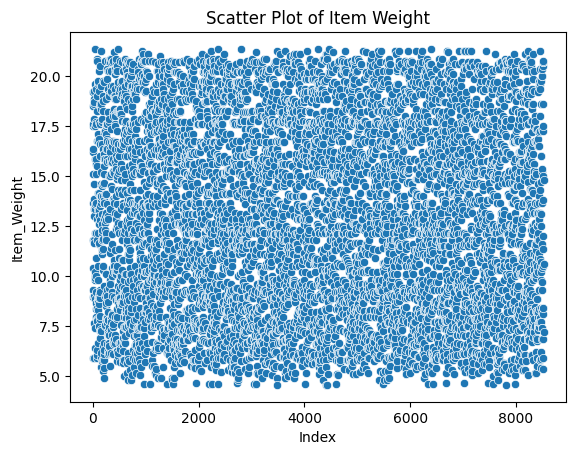

In [8]:
sns.scatterplot(x=train.index,y=train['Item_Weight'])
plt.xlabel('Index')
plt.title('Scatter Plot of Item Weight')
plt.show()

<Axes: title={'center': 'Density Plot of Item Weight'}, xlabel='Item Weight', ylabel='Density'>

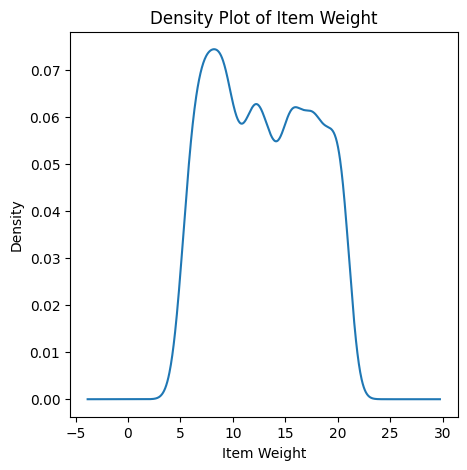

In [9]:
plt.figure(figsize=(5,5))
plt.xlabel('Item Weight')
plt.title('Density Plot of Item Weight')
train['Item_Weight'].plot(kind='density')

ii. Item Visibility

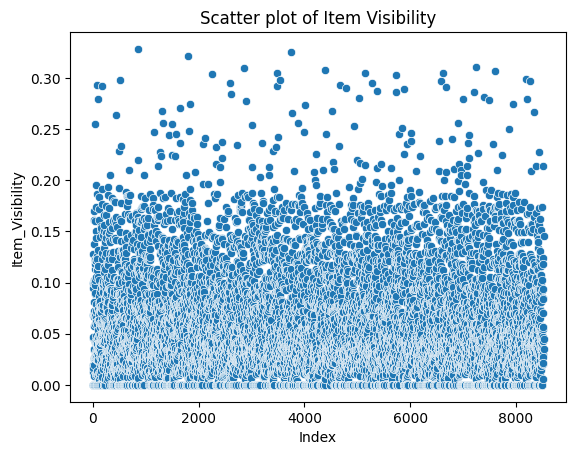

In [10]:
sns.scatterplot(x=train.index,y=train['Item_Visibility'])
plt.xlabel('Index')
plt.title('Scatter plot of Item Visibility')
plt.show()

<Axes: title={'center': 'Density Plot of Item Visibility'}, xlabel='Item Visibility', ylabel='Density'>

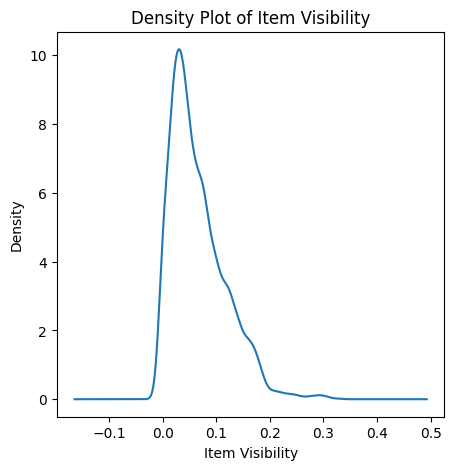

In [11]:
plt.figure(figsize=(5,5))
plt.xlabel('Item Visibility')
plt.title('Density Plot of Item Visibility')
train['Item_Visibility'].plot(kind='density')

iii. Item MRP

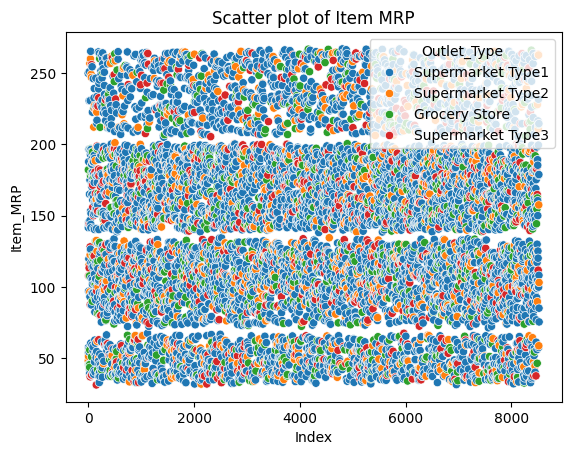

In [12]:
sns.scatterplot(x=train.index,y=train['Item_MRP'],hue=train['Outlet_Type'])
plt.xlabel('Index')
plt.title('Scatter plot of Item MRP')
plt.show()

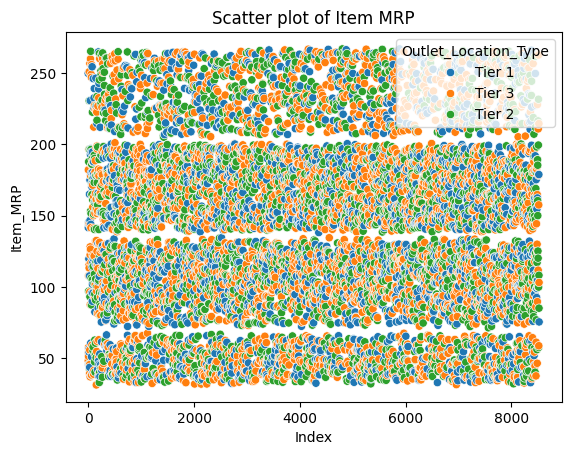

In [13]:
sns.scatterplot(x=train.index,y=train['Item_MRP'],hue=train['Outlet_Location_Type'])
plt.xlabel('Index')
plt.title('Scatter plot of Item MRP')
plt.show()

<Axes: title={'center': 'Density Plot of Item MRP'}, xlabel='Item MRP', ylabel='Density'>

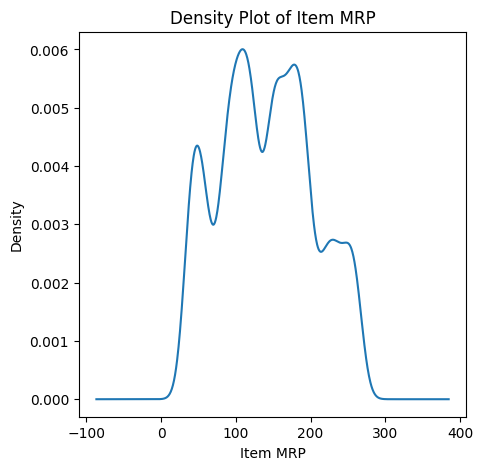

In [14]:
plt.figure(figsize=(5,5))
plt.xlabel('Item MRP')
plt.title('Density Plot of Item MRP')
train['Item_MRP'].plot(kind='density')

iv. Item Outlet Sales

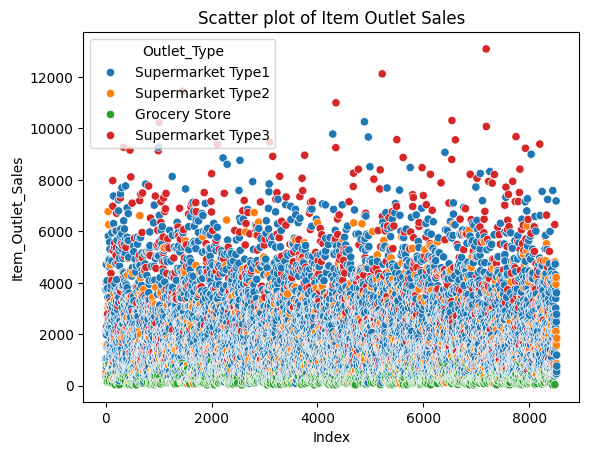

In [15]:
sns.scatterplot(x=train.index,y=train['Item_Outlet_Sales'],hue=train['Outlet_Type'])
plt.xlabel('Index')
plt.title('Scatter plot of Item Outlet Sales')
plt.show()

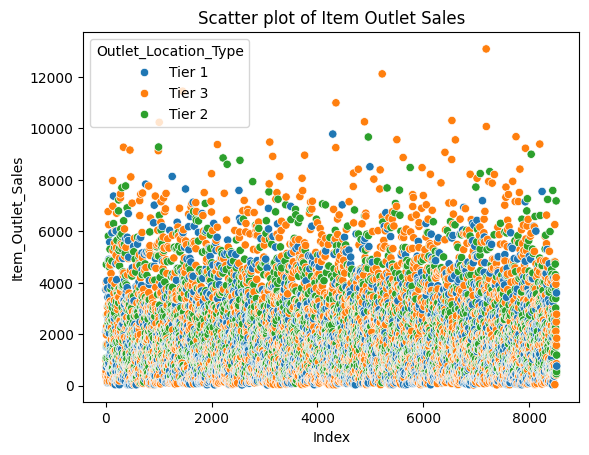

In [16]:
sns.scatterplot(x=train.index,y=train['Item_Outlet_Sales'],hue=train['Outlet_Location_Type'])
plt.xlabel('Index')
plt.title('Scatter plot of Item Outlet Sales')
plt.show()

<Axes: title={'center': 'Density Plot of Item Outlet Sales'}, xlabel='Item Outlet Sales', ylabel='Density'>

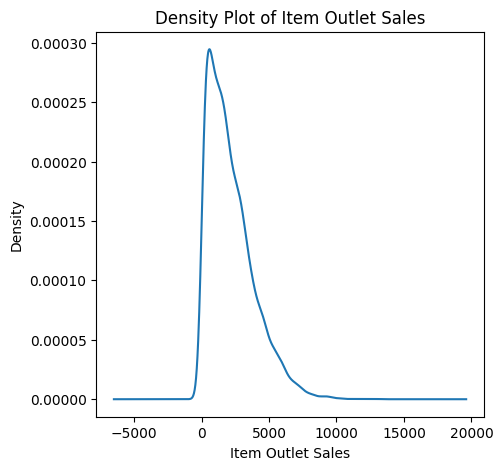

In [17]:
plt.figure(figsize=(5,5))
plt.xlabel('Item Outlet Sales')
plt.title('Density Plot of Item Outlet Sales')
train['Item_Outlet_Sales'].plot(kind='density')

# 5. Bivariate Feature Analysis

i. Item Weight vs Item MRP

Text(0, 0.5, 'Item MRP')

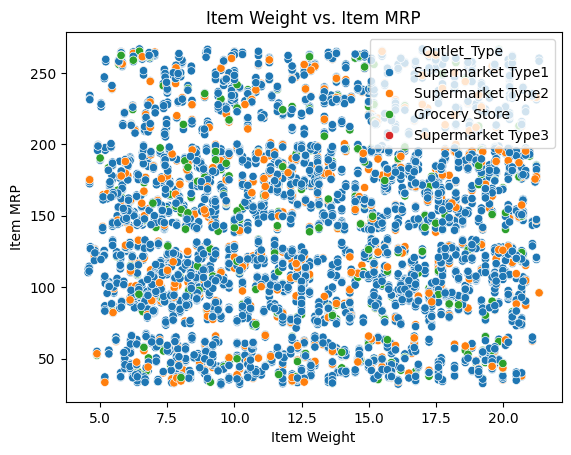

In [18]:
sns.scatterplot(x=train['Item_Weight'],y=train['Item_MRP'],hue=train['Outlet_Type'])
plt.title('Item Weight vs. Item MRP')
plt.xlabel('Item Weight')
plt.ylabel('Item MRP')

Text(0, 0.5, 'Item MRP')

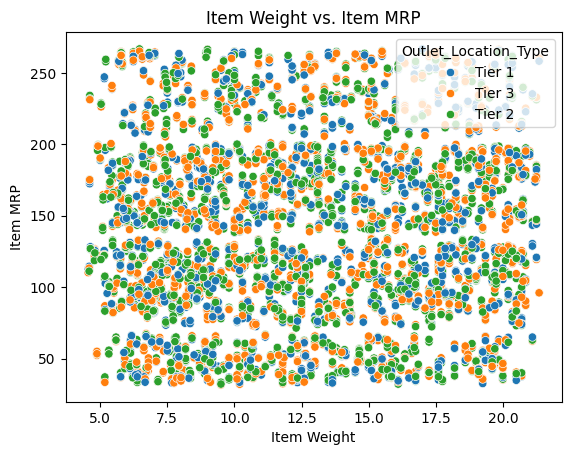

In [19]:
sns.scatterplot(x=train['Item_Weight'],y=train['Item_MRP'],hue=train['Outlet_Location_Type'])
plt.title('Item Weight vs. Item MRP')
plt.xlabel('Item Weight')
plt.ylabel('Item MRP')

ii. Item Visibility vs Item MRP

Text(0, 0.5, 'Item MRP')

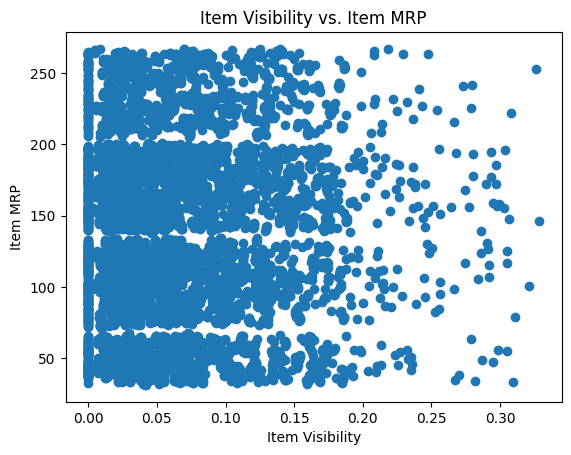

In [20]:
plt.scatter(train['Item_Visibility'],train['Item_MRP'])
plt.title('Item Visibility vs. Item MRP')
plt.xlabel('Item Visibility')
plt.ylabel('Item MRP')

iii. Outlet Type vs Item MRP

Text(0, 0.5, 'Item MRP')

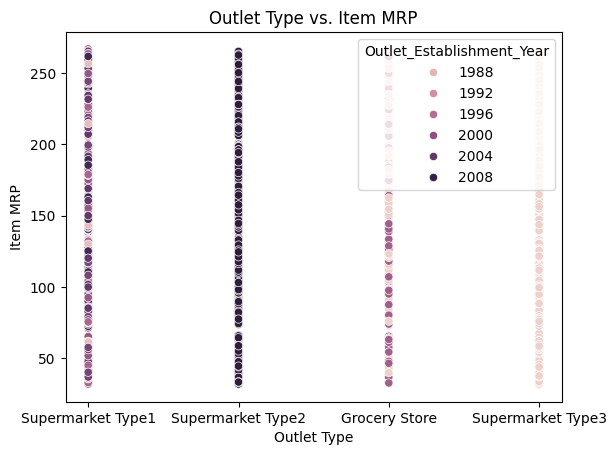

In [21]:
sns.scatterplot(x=train['Outlet_Type'],y=train['Item_MRP'],hue=train['Outlet_Establishment_Year'])
plt.title('Outlet Type vs. Item MRP')
plt.xlabel('Outlet Type')
plt.ylabel('Item MRP')

iv. Outlet Type vs Item Outlet Sales

Text(0, 0.5, 'Item Outlet Sales')

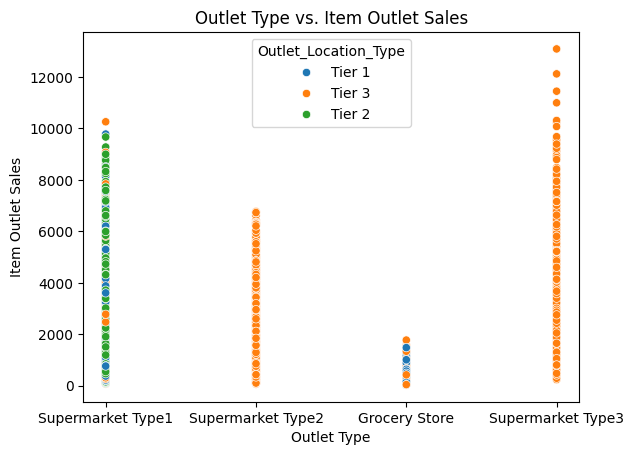

In [22]:
sns.scatterplot(x=train['Outlet_Type'],y=train['Item_Outlet_Sales'],hue=train['Outlet_Location_Type'])
plt.title('Outlet Type vs. Item Outlet Sales')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')

Text(0, 0.5, 'Item Outlet Sales')

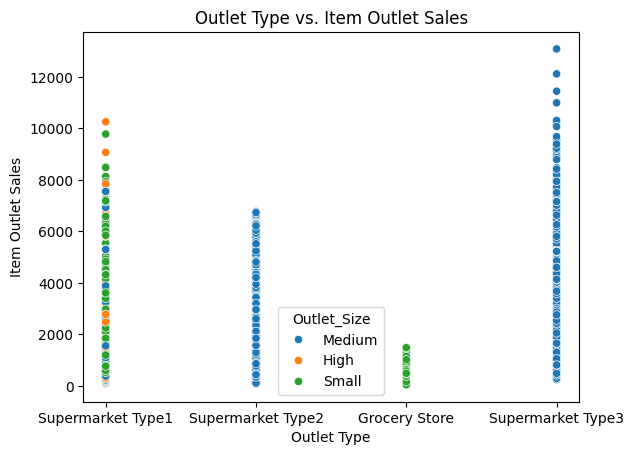

In [23]:
sns.scatterplot(x=train['Outlet_Type'],y=train['Item_Outlet_Sales'],hue=train['Outlet_Size'])
plt.title('Outlet Type vs. Item Outlet Sales')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')

Text(0, 0.5, 'Item Outlet Sales')

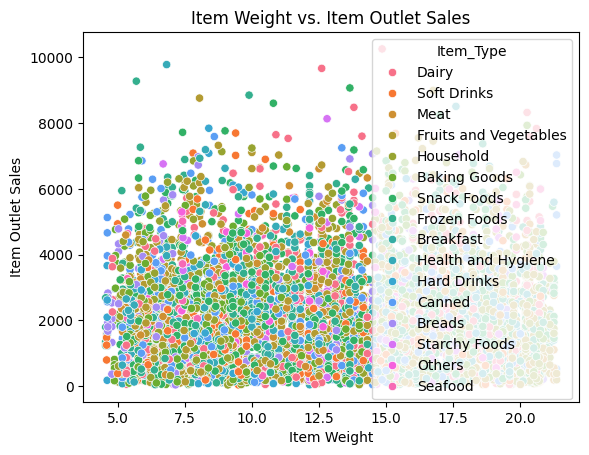

In [24]:
sns.scatterplot(x=train['Item_Weight'],y=train['Item_Outlet_Sales'],hue=train['Item_Type'])
plt.title('Item Weight vs. Item Outlet Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')

Text(0, 0.5, 'Item Outlet Sales')

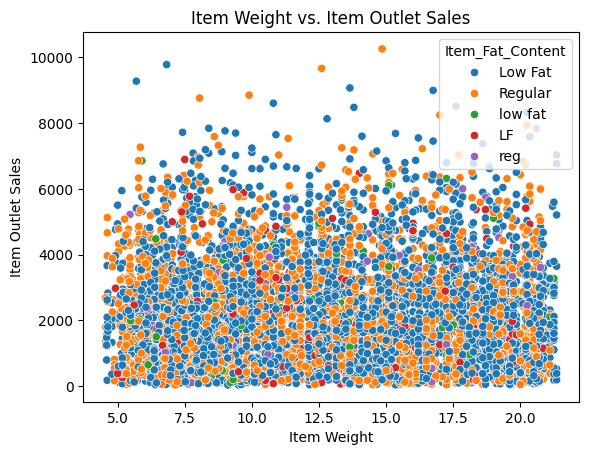

In [25]:
sns.scatterplot(x=train['Item_Weight'],y=train['Item_Outlet_Sales'],hue=train['Item_Fat_Content'])
plt.title('Item Weight vs. Item Outlet Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')

Text(0, 0.5, 'Item Outlet Sales')

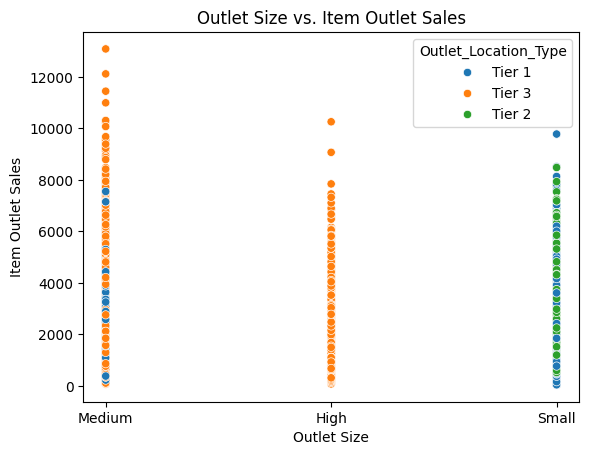

In [26]:
sns.scatterplot(x=train['Outlet_Size'],y=train['Item_Outlet_Sales'],hue=train['Outlet_Location_Type'])
plt.title('Outlet Size vs. Item Outlet Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')

Text(0, 0.5, 'Item Outlet Sales')

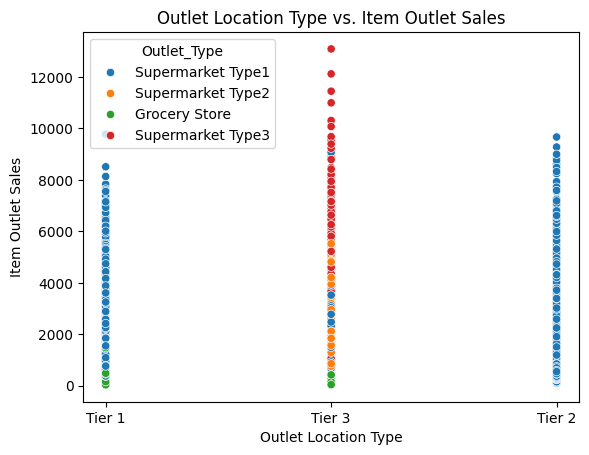

In [27]:
sns.scatterplot(x=train['Outlet_Location_Type'],y=train['Item_Outlet_Sales'],hue=train['Outlet_Type'])
plt.title('Outlet Location Type vs. Item Outlet Sales')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')

# 6. Missing Value Treatment

In [28]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
import numpy as np

med_weight = train['Item_Weight'].median()

train['Item_Weight'].replace(np.nan,med_weight,inplace=True)

print(train.isnull().sum())



Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [30]:
def replace_null_with_mode(row):
    if pd.isnull(row['Outlet_Size']):
        mode_size = train.loc[train['Outlet_Type'] == row['Outlet_Type'], 'Outlet_Size'].mode()
        if not mode_size.empty:
            return mode_size.iloc[0]
    return row['Outlet_Size']

# Apply the function to each row
train['Outlet_Size'] = train.apply(replace_null_with_mode, axis=1)

In [31]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 7. Feature Engineering

i. Finding Redundant Labels

In [32]:
cat_ifc = train['Item_Fat_Content'].unique()
cat_ifc

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [33]:
train['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

cat_ifc = train['Item_Fat_Content'].unique()
print(cat_ifc)

['Low Fat' 'Regular']


**ii. One Hot Encoding**

From Bivariate Analysis it  has been observed that 'Item_Fat_Content' and 'Item_Type' are nominal features where there is no specific preference order. So we must perform one hot encoding.

In [34]:
one_hot_encoded = pd.get_dummies(train['Item_Fat_Content'], prefix='IFC')


i=2
for col_n,col_d in one_hot_encoded.items():
  train.insert(loc=i,column=col_n,value=col_d)
  i=i+1

print(train.head(3))

  Item_Identifier  Item_Weight  IFC_Low Fat  IFC_Regular Item_Fat_Content  \
0           FDA15         9.30            1            0          Low Fat   
1           DRC01         5.92            0            1          Regular   
2           FDN15        17.50            1            0          Low Fat   

   Item_Visibility    Item_Type  Item_MRP Outlet_Identifier  \
0         0.016047        Dairy  249.8092            OUT049   
1         0.019278  Soft Drinks   48.2692            OUT018   
2         0.016760         Meat  141.6180            OUT049   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  


In [35]:
train.drop('Item_Fat_Content',axis=1,inplace=True)

In [36]:
cat_it = train['Item_Type'].unique()
cat_it

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [37]:
one_hot_encoded = pd.get_dummies(train['Item_Type'], prefix='IT')

i=5
for col_n,col_d in one_hot_encoded.items():
  train.insert(loc=i,column=col_n,value=col_d)
  i=i+1

print(train.head(3))

  Item_Identifier  Item_Weight  IFC_Low Fat  IFC_Regular  Item_Visibility  \
0           FDA15         9.30            1            0         0.016047   
1           DRC01         5.92            0            1         0.019278   
2           FDN15        17.50            1            0         0.016760   

   IT_Baking Goods  IT_Breads  IT_Breakfast  IT_Canned  IT_Dairy  ...  \
0                0          0             0          0         1  ...   
1                0          0             0          0         0  ...   
2                0          0             0          0         0  ...   

   IT_Soft Drinks  IT_Starchy Foods    Item_Type  Item_MRP  Outlet_Identifier  \
0               0                 0        Dairy  249.8092             OUT049   
1               1                 0  Soft Drinks   48.2692             OUT018   
2               0                 0         Meat  141.6180             OUT049   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0     

In [38]:
train.drop('Item_Type',axis=1,inplace=True)

**iii. Label Encoding**

From Bivariate Analysis it  has been observed that 'Outlet_Size', 'Outlet_Location_Type' and 'Outlet_Type' are ordinal features where there is a specific preference order. So we must perform label encoding where value with high preference is encoded with greater value

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
cat_os = train['Outlet_Size'].unique()

priority_os = {'High':0,'Small':1,'Medium':2}
pr_os_train = train['Outlet_Size'].map(priority_os)

label_encoder = LabelEncoder()

train['Outlet_Size'] = label_encoder.fit_transform(pr_os_train)

In [41]:
cat_olt = train['Outlet_Location_Type'].unique()
cat_olt

priority_olt = {'Tier 1':0,'Tier 2':1,'Tier 3':2}
pr_olt_train = train['Outlet_Location_Type'].map(priority_olt)

label_encoder = LabelEncoder()

train['Outlet_Location_Type'] = label_encoder.fit_transform(pr_olt_train)

In [42]:
cat_ot = train['Outlet_Type'].unique()
cat_ot

priority_ot = {'Grocery Store':0,'Supermarket Type2':1,'Supermarket Type1':2,'Supermarket Type3':3}
pr_ot_train = train['Outlet_Type'].map(priority_ot)

label_encoder = LabelEncoder()

train['Outlet_Type'] = label_encoder.fit_transform(pr_ot_train)

# Test Set Preprocessing

In [43]:
med_weight = test['Item_Weight'].median()

test['Item_Weight'].replace(np.nan,med_weight,inplace=True)

def replace_null_with_mode_test(row):
    if pd.isnull(row['Outlet_Size']):
        mode_size = test.loc[test['Outlet_Type'] == row['Outlet_Type'], 'Outlet_Size'].mode()
        if not mode_size.empty:
            return mode_size.iloc[0]
    return row['Outlet_Size']

test['Outlet_Size'] = test.apply(replace_null_with_mode_test, axis=1)

test['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
test['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
test['Item_Fat_Content'].replace('reg','Regular',inplace=True)

one_hot_encoded = pd.get_dummies(test['Item_Fat_Content'], prefix='IFC')


i=2
for col_n,col_d in one_hot_encoded.items():
  test.insert(loc=i,column=col_n,value=col_d)
  i=i+1

test.drop('Item_Fat_Content',axis=1,inplace=True)

one_hot_encoded = pd.get_dummies(test['Item_Type'], prefix='IT')


i=5
for col_n,col_d in one_hot_encoded.items():
  test.insert(loc=i,column=col_n,value=col_d)
  i=i+1

test.drop('Item_Type',axis=1,inplace=True)



pr_os_test = test['Outlet_Size'].map(priority_os)

test['Outlet_Size'] = label_encoder.fit_transform(pr_os_test)


pr_olt_test = test['Outlet_Location_Type'].map(priority_olt)

test['Outlet_Location_Type'] = label_encoder.fit_transform(pr_olt_test)


pr_ot_test = test['Outlet_Type'].map(priority_ot)

test['Outlet_Type'] = label_encoder.fit_transform(pr_ot_test)




In [44]:
test.head(5)

Item_Identifier  Item_Weight  IFC_Low Fat  IFC_Regular  Item_Visibility  \
0           FDW58       20.750            1            0         0.007565   
1           FDW14        8.300            0            1         0.038428   
2           NCN55       14.600            1            0         0.099575   
3           FDQ58        7.315            1            0         0.015388   
4           FDY38       12.500            0            1         0.118599   

   IT_Baking Goods  IT_Breads  IT_Breakfast  IT_Canned  IT_Dairy  ...  \
0                0          0             0          0         0  ...   
1                0          0             0          0         1  ...   
2                0          0             0          0         0  ...   
3                0          0             0          0         0  ...   
4                0          0             0          0         1  ...   

   IT_Seafood  IT_Snack Foods  IT_Soft Drinks  IT_Starchy Foods  Item_MRP  \
0           0               1               0                 0  107.8622   
1           0               0               0                 0   87.3198   
2           0               0               0                 0  241.7538   
3           0               1               0                 0  155.0340   
4           0               0               0                 0  234.2300   

   Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0             OUT049                       1999            2   
1             OUT017                       2007            1   
2             OUT010                       1998            1   
3             OUT017                       2007            1   
4             OUT027                       1985            2   

   Outlet_Location_Type  Outlet_Type  
0                     0            2  
1                     1            2  
2                     2            0  
3                     1            2  
4                     2            3  

[5 rows x 27 columns]

# Validation

# Fit The Model

In [45]:
target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
from sklearn import model_selection ,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def validate_model(model,dtrain,dtest,predictor,target,IDcol):
    X_train, X_val, y_train, y_val = train_test_split(dtrain[predictor], dtrain[target], test_size=0.3, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    print("Scores : MAE - %.4g | MSE - %.4g | R2 Score - %.4g" % (mean_absolute_error(y_val,y_pred),mean_squared_error(y_val,y_pred),r2_score(y_val,y_pred)))



In [46]:
from sklearn.linear_model import LinearRegression , Ridge,Lasso
predictor=[x for x in train.columns if x not in [target]+IDcol]
model1=LinearRegression()
validate_model(model1,train,test,predictor,target,IDcol)

Scores : MAE - 816.1 | MSE - 1.22e+06 | R2 Score - 0.5645


In [47]:
predictor=[x for x in train.columns if x not in [target]+IDcol]
model2 = Ridge(alpha=2.0)
validate_model(model2,train,test,predictor,target,IDcol)

Scores : MAE - 815.9 | MSE - 1.219e+06 | R2 Score - 0.5647


In [51]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
validate_model(model3,train,test,predictor,target,IDcol)

Scores : MAE - 786.5 | MSE - 1.284e+06 | R2 Score - 0.5417


# Hyperparameter Tuning

In [53]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from scipy.stats import uniform, randint

param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': randint(1, 10),
    'min_child_weight': [1, 2, 5, 10],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'n_estimators': [100, 500, 1000],
}

param_grid_gbr = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.6, 0.4),
    'n_estimators': [100, 500, 1000],
}

xgb_model = xgb.XGBRegressor()
gbr_model = GradientBoostingRegressor()

xgb_random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)
gbr_random_search = RandomizedSearchCV(gbr_model, param_distributions=param_grid_gbr, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

X_train, X_val, y_train, y_val = train_test_split(train[predictor], train[target], test_size=0.3, random_state=42)

xgb_random_search.fit(X_train, y_train)
gbr_random_search.fit(X_train, y_train)


print("Best XGBoost Parameters:", xgb_random_search.best_params_)
print("Best XGBoost Score:", xgb_random_search.best_score_)
print("Best GBR Parameters:", gbr_random_search.best_params_)
print("Best GBR Score:", gbr_random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best XGBoost Parameters: {'colsample_bytree': 0.7620808347125668, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.9291161407506773}
Best XGBoost Score: 0.5953448423423422
Best GBR Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.651663766060598}
Best GBR Score: 0.5978523402516245


# Testing Models

In [56]:
best_xgboost_param = {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9291161407506773}
best_xgboost_model = GradientBoostingRegressor(**best_xgboost_param)
validate_model(best_xgboost_model,train,test,predictor,target,IDcol)


Scores : MAE - 739.3 | MSE - 1.122e+06 | R2 Score - 0.5993


In [57]:
best_gbr_param = {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.651663766060598}
best_gbr_model = GradientBoostingRegressor(**best_xgboost_param)
validate_model(best_gbr_model,train,test,predictor,target,IDcol)

Scores : MAE - 739.9 | MSE - 1.123e+06 | R2 Score - 0.5991


Out of all models, we can observe that "best_xgboost_model" performed well on the given dataset. So we are using it to make predictions on test set.

In [58]:
best_xgboost_model.predict(test[predictor])

array([1673.37452558, 1398.42143609,  680.76299882, ..., 1905.56651592,
       3617.26264248, 1280.65784805])

# **Saving The Final Model**



In [60]:
import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_xgboost_model, f)